In [1]:
import sys
sys.path.append('../')
from PINN_Survey.problems.klein_gordon.data.load import load_klein_gordon_bounds
from PINN_Survey.problems.klein_gordon.v1 import Klein_Gordon, Klein_Gordon_Soft_Mesh,Klein_Gordon_Domain_Transformer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_true, U_true, X_bounds, U_bounds, _ = load_klein_gordon_bounds()

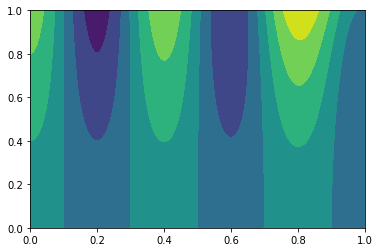

In [3]:
plt.tricontourf(X_true[:,1], X_true[:,0], U_true[:,0])

In [4]:
X = np.vstack(X_bounds)
U = np.vstack(U_bounds)

idx = np.random.choice( list(range(X_true.shape[0])), size=5000 )
X_df = X_true[idx,:]

lower_bound = np.min(X_true,axis=0)
upper_bound = np.max(X_true,axis=0)

In [5]:
print(X.shape,U.shape,X_df.shape)

(768, 2) (768, 1) (5000, 2)


In [6]:
model = Klein_Gordon(lower_bound, upper_bound, [2,50,50,50,50,50,1], alpha=-1, beta=0, gamma=1, k=3)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





In [7]:
model.train_BFGS(X,U,X_df,True)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.005088
  Number of iterations: 4699
  Number of functions evaluations: 4988


In [8]:
U_hat = model.predict(X_true)

print("RMSE", np.sqrt(np.mean((U_true[:,0] - U_hat[:,0])**2)) )
print("Relative Error", np.linalg.norm(U_true-U_hat,2)/np.linalg.norm(U_true,2))

RMSE 0.5292762669040683
Relative Error 1.2376698204528753


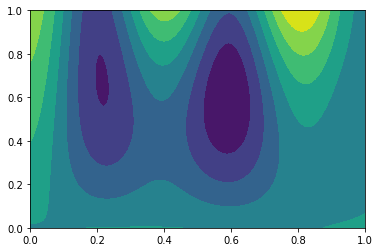

In [9]:
plt.tricontourf(X_true[:,1], X_true[:,0], U_hat[:,0])

In [11]:
model = Klein_Gordon_Soft_Mesh(lower_bound, upper_bound, [2,50,50,50,50,1], [2,50,50],alpha=-1, beta=0, gamma=1, k=3)
model.train_BFGS(X,U,X_df,True)
U_hat = model.predict(X_true)

print("RMSE", np.sqrt(np.mean((U_true[:,0] - U_hat[:,0])**2)) )
print("Relative Error", np.linalg.norm(U_true-U_hat,2)/np.linalg.norm(U_true,2))

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.001899
  Number of iterations: 4184
  Number of functions evaluations: 4458
RMSE 0.14779408531517382
Relative Error 0.34560453674976993


In [13]:
model = Klein_Gordon_Domain_Transformer(lower_bound, upper_bound,50,6,alpha=-1, beta=0, gamma=1, k=3)
model.train_BFGS(X,U,X_df,True)
U_hat = model.predict(X_true)

print("RMSE", np.sqrt(np.mean((U_true[:,0] - U_hat[:,0])**2)) )
print("Relative Error", np.linalg.norm(U_true-U_hat,2)/np.linalg.norm(U_true,2))

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 0.003726
  Number of iterations: 4106
  Number of functions evaluations: 4378
RMSE 0.24724016404821803
Relative Error 0.5781511633540908
